<font face="Times New Roman" size="3">
<hr style="width:100%;height:2px;color:black">
<div style="width:100%">
    <div style="float:left;width:50%">Albert-Ludwigs-Universität Freiburg</div>
    <div style="float:left;width:50%;text-align:right">Wintersemester 2022/23</div> 
</div>
<div style="clear:both;text-align:center">
    <h1 style="margin-top:20px;padding:0px">Datenanalyse für Naturwissenschaftler*Innen</h1>
    <h2 style="margin:5px;padding:0px">Statistische Methoden in Theorie und Praxis</h2>
    Vorlesung: Dr. Andrea Knue<br />
    Übungsleitung: Dr. Constantin Heidegger<br />
    <h1 style="margin:10px;padding:0px">Übung 8</h1>
    Ausgabe: 9. Dezember 2022 10:00 Uhr, Abgabe: 16. Dezember 2022 bis 10:00 Uhr via Ilias
</div>
<hr style="font-family:width:100%;height:2px;color:black">
</font>

<font face="Times New Roman" size=3>
    <h3 style="margin:0px">Aufgabe 3: Bestimmung der Zerfallskonstante exponentiell verteilter Daten (15P)</h3>
</font>

Ein Teilchenzerfall kann mit einer Wahrscheinlichkeitsdichte $p$ in Abhängigkeit der Zeit $t$ beschrieben werden, wobei $p(t)$ die exponentiell abnehmende Wahrscheinlichkeit ist, dass ein Teilchen zerfällt:
$$p(t) = \lambda e^{-\lambda t}.$$
Hier bezeichnet $\lambda=1/\tau$, wobei $\tau$ die _Zerfallskonstante_ ist.

In dieser Aufgabe wollen wir die Maximum-Likelihood Methode verwenden um den Parameter $\lambda$ für eine vorgegebene Verteilung $p(t)$ zu schätzen.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import math

In [4]:
## von Übungsblatt 5:
def listOfBins(xmin, xmax, nbins):
    return [xmin+(xmax-xmin)/nbins*i for i in range(nbins+1)] ## +1 since we need the upper bound as well

<font face="Times New Roman" size=4>
a) Wahrscheinlichkeitsdichte (1P)
</font>

Zunächst müssen wir unsere Daten "erzeugen". Normalerweise würde man eine geschlossene Menge von Teilchen betrachten, und die Anzahl der noch nicht zerfallenen Teilchen in Abhängigkeit der Zeit messen. Damit könnte man dann $p(t)$ rekonstruieren. In unserem Fall haben wir gerade keine radioaktive Quelle zur Hand, und erfinden einfach die einzelnen Teilchenzerfälle indem wir eine Menge von $n$ Zahlen generieren, die der obigen Verteilung genügen.

Schreiben Sie also eine Funktion `createData` unter der Verwendung von `numpy.random.exponential` um sich eine Liste von `n` Zufallszahlen in Abhängigkeit des Parameters `l` generieren zu lassen.

*Hinweis:* lesen Sie die Dokumentation der Funktion (https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html) um zu sehen, welche Parameter verwendet werden.

In [2]:
def createData(l, n):
    np.random.seed(0)
    return np.random.exponential(1/l, n)


def zerfall(t, Lambda, tau):
    Lambda = 1 / tau
    return Lambda * np.exp(-(Lambda / t))


Erstellen Sie ein Histogramm mit 50 Bins für $0\leq t\leq10$ und befüllen Sie es mit 100000 Zufallszahlen für $\lambda = 2$. Nennen Sie die Liste der Zufallszahlen `p`. Definieren Sie den Wert von $\lambda$ in einer extra Zelle und weisen Sie ihn der Variable `lamb` zu.

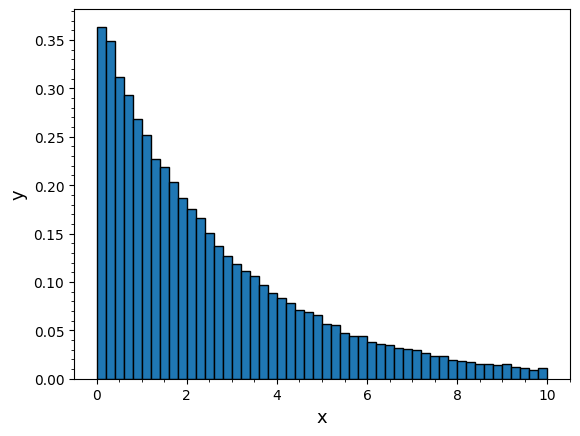

array([2.16341121, 3.41397377, 2.5095807 , ..., 4.5162366 , 2.17681173,
       0.6955214 ])

In [6]:
p = createData(0.367879441,100000)
b = listOfBins(0, 10, 50)
plt.hist(p, bins=b, density=True,  edgecolor="k")
plt.xlabel("x", fontsize=13)
plt.ylabel("y", fontsize=13)
plt.minorticks_on()
plt.show()
p

In [ ]:
lamb = 2

<font face="Times New Roman" size=4>
b) Log-Likelihood (2P)
</font>

Nun tun wir so, als hätte Aufgabenteil a) nicht stattgefunden und wir würden einfach nur die Liste `p` der Messwerte (also Lebensdauer je Teilchen) bekommen und würden nun herausfinden müssen, wie groß `lambda` ist.

Dafür schreiben wir zunächste eine Funktion `logLikelihood`, die den _negativen_ Logarithmus der Likelihood für die Exponentialverteilung berechnet (dass die Daten exponentiell verteilt sind, wissen wir ja, nur nicht mit welchem Parameter `lambda`). Der Logarithmus der Likelihood hat folgende Form:
$$ -\ln L (\lambda) = -\left(\sum_{i=1}^{n} \left[ \ln \left( \lambda \right) - \lambda\cdot t_i \right]\right) $$
wobei $n$ die Stichprobengröße ist, $t_i$ die Messwerte der Stichprobe (also unsere Zufallszahlen). Die Funktion soll die Stichprobe `p` und einen Parameter `lambda_poi` ("Parameter of Interest") als Argumente nehmen (merke: `lambda` selber ist ein reservierter Begriff innerhalb von Python). Den natürlichen Logarithmus können Sie über die Funktion `log` der `math` Bibliothek berechnen.

In [ ]:
def logLikelihood(p, lambda_poi):
    return - np.sum(math.log(lambda_poi) - lambda_poi*p)

Testen Sie Ihre Funktion für verschiedene Werte von $\lambda$.

<font face="Times New Roman" size=4>
c) Grafische Darstellung (1P)
</font>

Wir wollen nun die Log-Likelihood als Funktion von $\lambda$ grafisch darstellen um den Verlauf erkennen zu können. Da wir den wahren Wert von $\lambda$ auf Teil a) noch kennen, müssten wir ein Maximum an diesem Wert finden. Genau das wollen wir jetzt verifizieren indem wir zunächst eine Liste `l` von Zahlen im Abstand von 0.01 zwischen $\lambda-1$ und $\lambda+1$ erstellen. Diese soll uns als Werte für `lambda_poi` dienen, um die Log-Likelihood zu berechnen und darzustellen. Konkret erstellen wir eine Liste `y` der entsprechenden Werte der Log-Likelihood für `l`, und erstellen dann ein Diagramm. Fügen Sie sinnvolle Achsenbegrenzungen und -beschriftungen Ihrem Diagramm hinzu!

*Hinweis:* Gegebenenfalls müssen Sie Ihre Liste filtern, da der Logarithmus von 0 undefiniert ist.

<font face="Times New Roman" size=4>
d) Parameterschätzung, Teil 1 (3P)
</font>

Ermittlen Sie nun den $-\ln L$ minimierenden Parameter $\hat{\lambda}$ und seinen Fehler mittels:
$$-\ln L (\hat{\lambda} \pm \hat{\sigma}_{\hat{\lambda}}) = -\left(\ln L_\mathrm{min} - \frac{1}{2}\right).$$ 
Das Minimum der Log-Likelihood Funktionen können Sie leicht aus `y` auslesen und von da auf $\hat{\lambda}$ zurückschließen. Für die Standardabweichung suchen Sie jene Werte von $\lambda$ die eine Log-Likelihood ergeben, die zu $(\ln L_\mathrm{min} - 1/2)$ _am nächsten_ gelegen sind (siehe auch Vorlesung).

*Hinweis:* verwenden Sie die Funktion `a.argsort()[:m]` um die Indizes der `m` niedrigsten Elemente in einem `numpy` Array `a` zu finden. Achten Sie darauf, dass die 0.01er Schritte, die wir für $\lambda$ gewählt haben, ggf. zu groß sind, sodass obige Funktion auch das Minimum selber nochmal findet (Sie müssen also `m` geschickt wählen).

<font face="Times New Roman" size=4>
e) Parameterschätzung, Teil 2 (3P)
</font>

Wir wiederholen nun Teil d) indem wir die Parameterschätzung über einen Fit der Exponentialfunktion zu unseren Daten exktrahieren. Dies können Sie mit der Bibliothek `scipy` (Scientific Python), insbesondere der Funktion `optimize.minimize`, erledigen. Diese verlangt aber, dass die Daten in einem gewissen Format übergeben werden. Daher schreiben Sie zuerst zwei Funktionen: `expFunc` (gibt $p(t)$ für zwei Parameter `t` und `lamb` zurück, verwenden Sie `np.exp` und nicht `math.exp`!) und `negLogLik`, die die Log-Likelihood für eine allgemeine Funktion `func` zurückgibt:

In [ ]:
def negLogLik(args, func,  data):
    return -np.sum(np.log(func(data, *args)))

Der Rückgabewert von `optimize.minimize` ist relativ komplex. Sie können den geschätzten Parameter via `.x` extrahieren (Achtung: das ist eine Liste!) und den Fehler über die zurückgegebene Hesse-Matrix berechnen. Folgende Funktion gibt Ihnen für ein Fit-Resultat eine Liste von Parameterschätzung und zugehörigem Fehler zurück:

In [ ]:
def getEstimateAndError(result):
    res = []
    for i in range(len(result.x)):
        res.append((result.x[i], math.sqrt(result.hess_inv[i][0])))
    return res

<font face="Times New Roman" size=4>
f) Iteratives Schätzen (3P)
</font>

Wir wollen nun den Erwartungswert für $\hat{\lambda}_{fit}$ aus dem Fit bestimmen. Ein möglicher Bias des Schätzers ist am besten bei einer kleineren Stichprobengröße zu bestimmen. Also splitten wir die Ereignisse aus `p`in kleinere Pakete auf, und zwar `m=10000` Stichproben mit je `n=10` Einzelmessungen. Folgende Funktion teilt eine Liste `lst` in `n` gleichgroße Teillisten auf:

In [ ]:
def chunks(lst, n):
    """ generiert Einzellisten mit n Einträgen aus lst """
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

Für jede der Stichproben wollen wir den obigen Fit aus Teil e) durchführen und die extrahierten Schätzwerte für $\lambda$ in einer Liste `lst_est` speichern. Wir wollen außerdem den Fehler in `lst_err` speichern. Es kann sein, dass manche dieser Fits nicht gelingen (insbesondere wenn `n` klein ist); überprüfen Sie also ob der Fit erfolgreich war (das ist einer der Rückgabewerte der `minimize` Funktion) und falls nicht, gehen Sie einfach zur nächsten Stichprobe über.

Plotten Sie `lst_est` (also die Verteilung der Schätzwerte für $\lambda$) und `lst_err` (die zugehörigen Fehler) in jeweils einem Histogram mit 20 Bins von 0 bis 10.

<font face="Times New Roman" size=4>
g) Bias und Effizienz des Schätzers (2P)
</font>

In der Vorlesung haben wir folgende Formeln für den Maximum-Likelihood-Schätzer $\hat{\lambda}$ bei einer Exponentialfunktion kennengelernt. Der Erwartungswert von $\hat{\lambda}$ ist: 
$$E[\hat{\lambda}]=\frac{n}{n-1}{\lambda}$$
d.h. der Bias ist gegeben durch $b=\lambda/(n-1)$. Für die zweite Ableitung der Log-Likelihood nach $\lambda$ gilt: $$\frac{\partial^2 \ln\mathcal{L}}{\partial\lambda^2}=-\frac{n}{\lambda^2}.$$
Berechnen Sie damit nun den Minimum Variance Bound (MVB):
$$\text{MVB}=\frac{(1+\frac{\partial b}{\partial\lambda})^2}{E\left[-\frac{\partial^2 \ln\mathcal{L}}{\partial\lambda^2}\right]}.$$
Setzen Sie $\lambda=1$.

<font face="Times New Roman" size=4>
g) Optional (0P)
</font>

Variieren Sie nun die Parameter (z.B. den Wert für $\lambda$ in Teil a) oder die Stichprobengröße in Teil f)) und schauen Sie, wie sich die Resultate Ihrer Parameterschätzung verhalten.